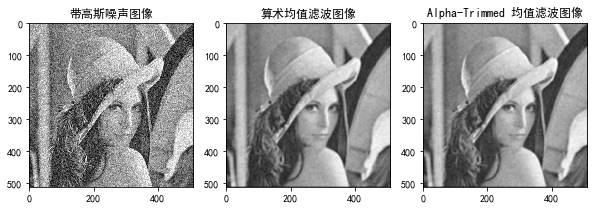

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负
#给图像添加高斯噪声
def addGaussianNoise(src,means,sigma):
    NoiseImg=src/src.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(means,sigma) 
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    NoiseImg=np.uint8(NoiseImg*255)
    return NoiseImg

def means_Afilter(input_image, filter_size):
    '''
    算术均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):
            output_image[i, j] =np.sum(filter_template * input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]) / (filter_size ** 2)
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return output_image

def Alpha_means_filter(input_image, filter_size, d):
    '''
    几何均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    ; d*2: 是需要剪除的元素个数
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''

    input_image_cp = np.copy(input_image)  # 输入图像的副本
    input_image_cp=input_image_cp/input_image_cp.max()
    d2=d*2
    filter2=filter_size**2
    mn=filter2-d2
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸    
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):
            temp=input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]
            temp1=temp.reshape(filter2,)
            temp1.sort()
            t=temp1[d:d+mn]
            output_image[i,j] =np.sum(t)/mn
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return np.uint8(output_image*255)


if __name__ == '__main__':
    img = cv2.imread(r'..\img\Lenna.png', flags=0)
    imgNoise = addGaussianNoise(img,0,0.1)#给图像添加高斯噪声
    img_A=means_Afilter(imgNoise, 7)
    img_G=Alpha_means_filter(imgNoise, 7,4)

            
    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(imgNoise,cmap='gray')
    plt.title("带高斯噪声图像")
    plt.subplot(132)
    plt.imshow(img_A,cmap='gray')
    plt.title("算术均值滤波图像")    
    plt.subplot(133)
    plt.imshow(img_G,cmap='gray')
    plt.title("Alpha-Trimmed 均值滤波图像")       
    plt.show()
